## 演習1

In [1]:
import pandas as pd
url = 'https://www.data.jma.go.jp/stats/etrn/view/monthly_s1.php?prec_no=46&block_no=47670&year=2017'
# url = '2017yokohama.html'

d = pd.read_html(url)
df = d[0] # 環境によっては d[5]
df.columns = [n for n in range(len(df.columns))] # カラム名を数字に変換
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1009.8,1015.1,24.5,19.5,3.5,1.0,6.8,11.0,3.1,...,西南西,236.8,NaN,--,--,--,3.7,2,0,0
1,2,1008.8,1014.1,15.0,5.0,3.5,3.0,7.5,11.9,3.8,...,南西,192.6,NaN,--,--,0,4.9,4,0,0
2,3,1009.1,1014.4,90.5,20.5,4.5,1.5,8.9,13.1,5.4,...,北,182.0,NaN,--,--,--,6.8,0,0,0
3,4,1007.7,1012.8,122.5,35.5,8.0,2.5,14.9,19.3,11.3,...,南,198.5,NaN,--,--,--,7.1,0,0,0
4,5,1007.4,1012.4,60.5,34.0,8.0,2.5,20.0,24.6,16.8,...,南南西,228.2,NaN,--,--,--,7.1,0,0,2
5,6,1003.5,1008.4,138.0,47.0,11.0,4.5,22.0,25.9,19.1,...,南南西,170.7,NaN,--,--,--,8.1,0,0,1
6,7,1004.2,1009.0,81.0,39.5,21.0,6.0,27.1,31.2,24.3,...,南南西,224.6,NaN,--,--,--,7.1,0,0,1
7,8,1002.7,1007.5,148.0,32.5,29.5,13.0,26.6,30.4,24.0,...,南,119.2 ),NaN,--,--,--,8.8,0,0,2
8,9,1006.6,1011.5,322.5,75.0,23.0,7.5,23.2,26.6,20.3,...,南南西,130.9,NaN,--,--,--,8.3,0,0,2
9,10,1013.1,1018.2,544.0,153.0,22.5,6.5,17.3,20.2,15.0,...,南南東,104.6,NaN,--,--,--,7.8,0,0,1


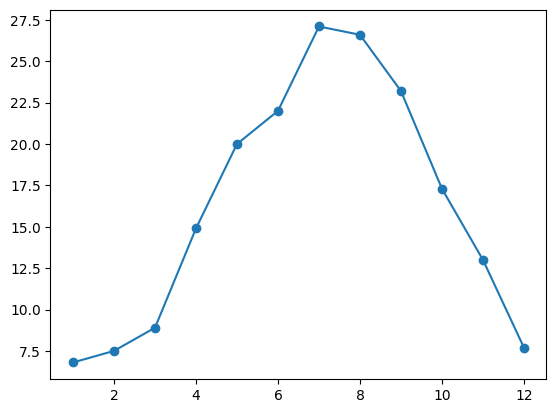

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#平均気温
temp = df[7]
month = np.arange(1,13)
plt.plot(month,temp,marker='o')

##  演習2

In [3]:
#降水量
rain = df[3]

<BarContainer object of 12 artists>

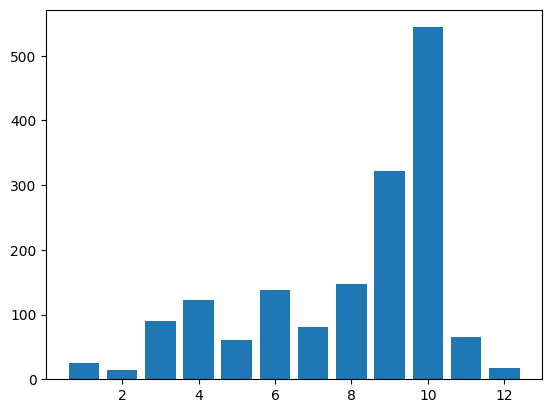

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

month = np.arange(1,13)

y = np.array(rain)
plt.bar(month,rain)

In [5]:
#降水料と日照時間の両方を棒グラフで表示しなさい。
rain = df[3]
daylen = df[19]


In [6]:
#日照時間のデータクリーニングのくだり(基本文法のみ)
# df[19] :日照時間のデータ
daytime = []                        # 新しくリストを用意
for s in df[19]:
    num_data = s.replace(')', '')   # 「)」 を除去
    daytime.append(float(num_data)) # float にしてリストに追加

daytime

[236.8,
 192.6,
 182.0,
 198.5,
 228.2,
 170.7,
 224.6,
 119.2,
 130.9,
 104.6,
 169.8,
 216.7]

In [7]:
#日照時間のデータクリーニングのくだり(re.sub())
import re
d19 = df[19] #日照時間のデータ
daytime = np.zeros(12,dtype='float32') #０で初期化
for i,d in enumerate(d19):
    daytime[i] = float(re.sub('\)','',d))  # 「)」 を除去
daytime #このデータをグラフ描画する

array([236.8, 192.6, 182. , 198.5, 228.2, 170.7, 224.6, 119.2, 130.9,
       104.6, 169.8, 216.7], dtype=float32)

In [8]:
#日照時間のデータクリーニングのくだり(re.search())
import re
d19 = df[19] #日照時間のデータ
daytime = []
for d in d19:
    match= re.search('[0-9.]+', d)       # 数値部分を検索 
    daytime.append(float(match.group())) # 見つかった部分を float に
daytime #このデータをグラフ描画する

[236.8,
 192.6,
 182.0,
 198.5,
 228.2,
 170.7,
 224.6,
 119.2,
 130.9,
 104.6,
 169.8,
 216.7]

In [9]:
#日照時間のデータクリーニングのくだり(map() と replace())
# df[19] :日照時間のデータ
daytime = df[19].map(lambda s: float(s.replace(')', '')))

daytime

0     236.8
1     192.6
2     182.0
3     198.5
4     228.2
5     170.7
6     224.6
7     119.2
8     130.9
9     104.6
10    169.8
11    216.7
Name: 19, dtype: float64

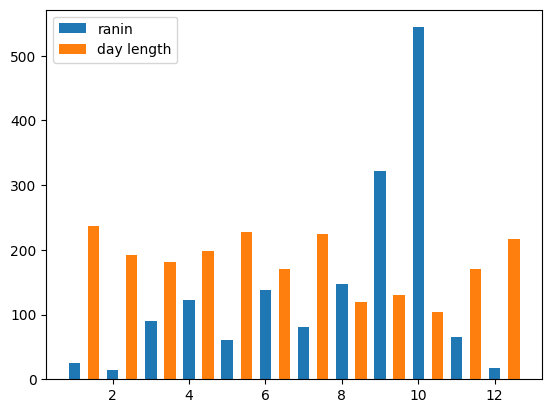

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(1,13)
x2 = x1 + 0.5
y1 = np.array(rain)
y2 = np.array(daytime)


plt.bar(x1,y1,width=0.3,label='ranin')
plt.bar(x2,y2,width=0.3,label='day length')
plt.legend()

## 演習3

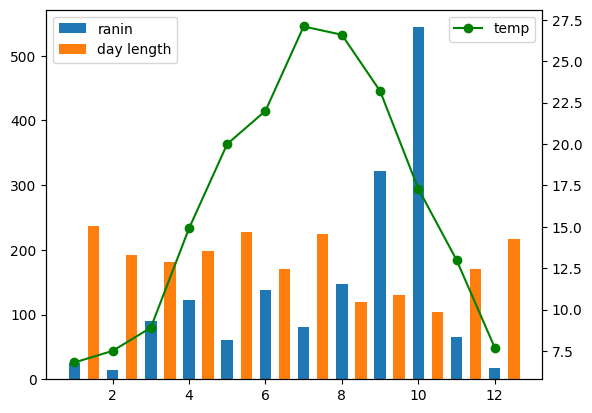

In [11]:
## 気温の折れ線グラフを追加しなさい。

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(1,13)
x2 = x1 + 0.5

y1 = np.array(rain)
y2 = np.array(daytime)

rain = df[3]
tmp = df[7]
y3 = np.array(temp)

plt.bar(x1,y1,width=0.3,label='ranin')
plt.bar(x2,y2,width=0.3,label='day length')
plt.legend()
plt.twinx() #軸を2つにする
plt.plot(x1,y3,c='g',marker='o',label='temp')
plt.legend()

## 演習4

In [21]:
# 部品を関数に
def get_weather_data(year):
    ''' year 年の横浜のデータ
    '''
    html = 'http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s1.php' + \
        f'?prec_no=46&block_no=47670&year={year}' 
    dfs = pd.read_html(html)
    df = dfs[0]

    rain = df.iloc[:,3]
    temp = df.iloc[:,7]
    daylen = clean_data(df.iloc[:,19])

    return (rain, temp, daylen)

def clean_data(srs):
    ''' Series データをクリーニングした結果を返す
    '''
    if srs.dtype != 'object':
        return srs
    else:
        return srs.map(lambda s: float(s.replace(')', '')))

def draw_graph(ax, rain, temp, daylen):
    '''グラフを書く
    '''
    months = np.arange(1, 13)
    ax.bar(months, rain, width=0.3, label='rain')
    ax.bar(months+0.5, daylen, width=0.3, label='day length')
    ax.legend()

    ax2 = ax.twinx() #軸を2つにする
    ax2.plot(months, temp, c='g', marker='o', label='temp')
    ax2.legend()


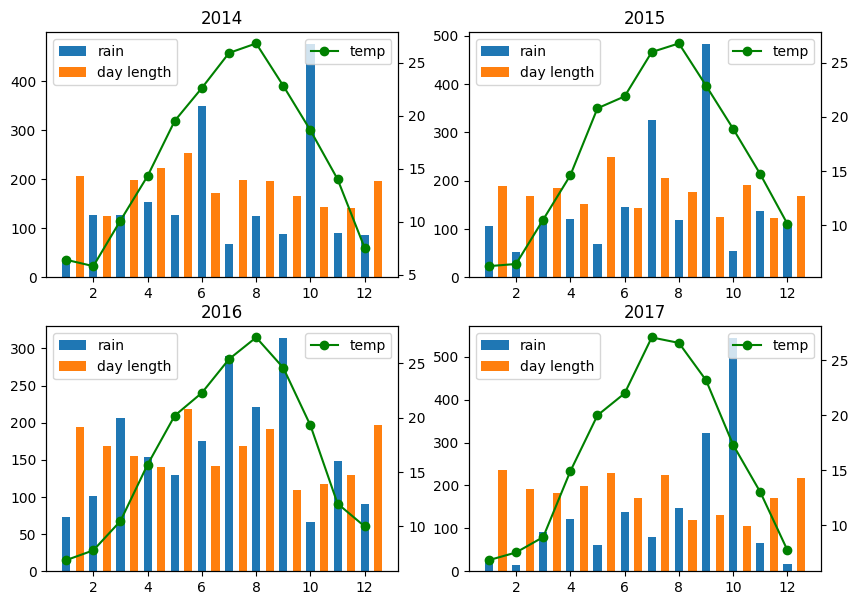

In [22]:
years = [2014, 2015, 2016, 2017]

fig = plt.figure(figsize=(10,7))
axes = [fig.add_subplot(2, 2, i, title=year) for (i, year) in zip(range(1, 5), years)]

for year, ax in zip(years, axes):
    rain, temp, daylen = get_weather_data(year)
    draw_graph(ax, rain, temp, daylen)


## 演習５

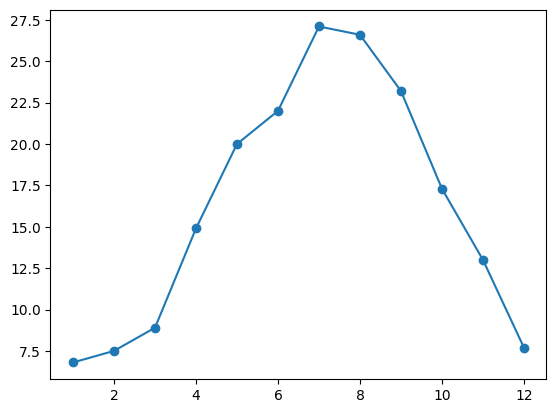

In [14]:
# 気温データを回帰曲線で予測値を表示しなさい。
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#平均気温
temp = df[7]

month = np.arange(1,13)

y = np.array(temp)
plt.plot(month,y,marker='o')

-0.0688681688704984 0.7481740481734456 1.1116809116815485 3.4141414141458686


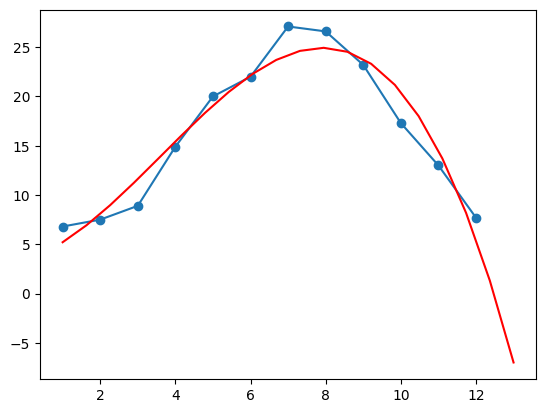

In [15]:
import numpy as np
from scipy import optimize as opt

#平均気温
temp = df[7]

month = np.arange(1,13)

def fit_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

res = opt.curve_fit(fit_func, month, temp.values.flatten())
a,b,c,d = res[0]
print(a,b,c,d)

yreal  = np.array(temp)
xt = np.linspace(1,13,20)

plt.plot(month,y,marker='o')
plt.plot(xt, a * xt**3 + b * xt**2 + c * xt + d,c='r')

## 演習6

In [16]:
import pandas as pd
url='http://www.data.jma.go.jp/fcd/yoho/typhoon/statistics/generation/generation.csv'

df = pd.read_csv(url ,delimiter=',',encoding='shift-jis')
df

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年間
0,1951,NaN,1.0,1.0,2.0,1.0,1.0,3.0,3,2,4,1.0,2.0,21
1,1952,NaN,NaN,NaN,NaN,NaN,3.0,3.0,5,3,6,3.0,4.0,27
2,1953,NaN,1.0,NaN,NaN,1.0,2.0,1.0,6,3,5,3.0,1.0,23
3,1954,NaN,NaN,1.0,NaN,1.0,NaN,1.0,5,5,4,3.0,1.0,21
4,1955,1.0,1.0,1.0,1.0,NaN,2.0,7.0,6,4,3,1.0,1.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2018,1.0,1.0,1.0,NaN,NaN,4.0,5.0,9,4,1,3.0,NaN,29
68,2019,1.0,1.0,NaN,NaN,NaN,1.0,4.0,5,6,4,6.0,1.0,29
69,2020,NaN,NaN,NaN,NaN,1.0,1.0,NaN,8,3,6,3.0,1.0,23
70,2021,NaN,1.0,NaN,1.0,1.0,2.0,3.0,4,4,4,1.0,1.0,22


In [17]:
df2 = df.fillna(0)

df2

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年間
0,1951,0.0,1.0,1.0,2.0,1.0,1.0,3.0,3,2,4,1.0,2.0,21
1,1952,0.0,0.0,0.0,0.0,0.0,3.0,3.0,5,3,6,3.0,4.0,27
2,1953,0.0,1.0,0.0,0.0,1.0,2.0,1.0,6,3,5,3.0,1.0,23
3,1954,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5,5,4,3.0,1.0,21
4,1955,1.0,1.0,1.0,1.0,0.0,2.0,7.0,6,4,3,1.0,1.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2018,1.0,1.0,1.0,0.0,0.0,4.0,5.0,9,4,1,3.0,0.0,29
68,2019,1.0,1.0,0.0,0.0,0.0,1.0,4.0,5,6,4,6.0,1.0,29
69,2020,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8,3,6,3.0,1.0,23
70,2021,0.0,1.0,0.0,1.0,1.0,2.0,3.0,4,4,4,1.0,1.0,22


In [18]:
data = df2[df2.columns[1:13]].mean()

m = np.arange(1,13)

<BarContainer object of 12 artists>

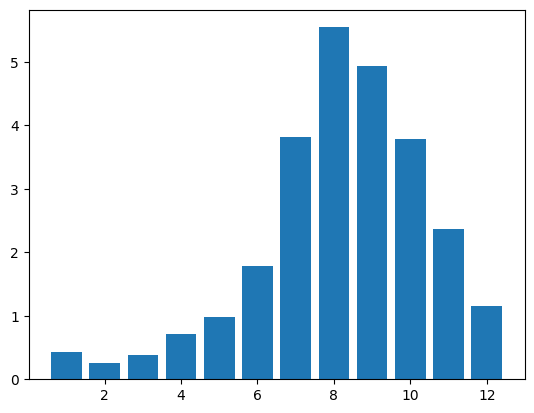

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.bar(m,data[:12])

### 演習７

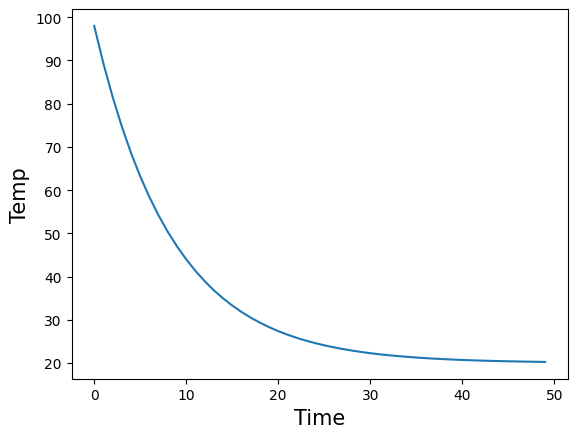

In [20]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


k = 0.118
TE = 20

def ED(t, y):
    dTdt = -k*(y[0]-TE)
      
    return [dTdt]

#トレース時間
T = 50
#飲み物の温度
T0=98

result = solve_ivp(ED, [0, T], [T0], t_eval=np.arange(0, T))
#plot
#fig = plt.figure(figsize=(10, 5))
plt.xlabel("Time",fontsize=15)
plt.ylabel("Temp",fontsize=15)
plt.plot(result.t,result.y.T)
